In [309]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
df = pd.read_csv('/Users/kimginam/Downloads/trainticket.csv')

In [311]:
df = df.drop(['price_tree', 'batch', 'id'], axis=1)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   insert_date  1000 non-null   object 
 1   origin       1000 non-null   object 
 2   destination  1000 non-null   object 
 3   start_date   1000 non-null   object 
 4   end_date     1000 non-null   object 
 5   train_type   1000 non-null   object 
 6   price        889 non-null    float64
 7   train_class  999 non-null    object 
 8   fare         999 non-null    object 
dtypes: float64(1), object(8)
memory usage: 70.4+ KB


In [313]:
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:30:00,2019-04-18 11:15:00,AVE,107.70,Turista,Flexible


In [314]:
df['fare'].value_counts()

Promo         696
Flexible      236
Adulto ida     53
Promo +        14
Name: fare, dtype: int64

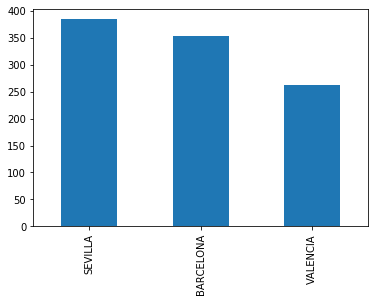

In [315]:
df['destination'].value_counts().plot.bar()

In [316]:
df['start_date'].value_counts()

2019-05-01 08:30:00    3
2019-04-18 07:00:00    3
2019-05-01 21:25:00    3
2019-05-12 16:30:00    3
2019-05-01 19:00:00    3
                      ..
2019-05-27 17:48:00    1
2019-05-05 09:00:00    1
2019-04-13 20:35:00    1
2019-05-17 11:00:00    1
2019-05-10 15:00:00    1
Name: start_date, Length: 866, dtype: int64

In [335]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['new_time'] = df['start_date'].apply(lambda x: x.strftime('%H%M'))

In [336]:
df['new_time'] = df['new_time'].astype(int)

In [337]:
df['new_time'].dtype

dtype('int64')

In [338]:
r = [0, 900, 1200, 1500, 1800, 2200]
g = [0,1,2,3,4]
df['new_start_time'] = pd.cut(df['new_time'], bins=r, labels=g)

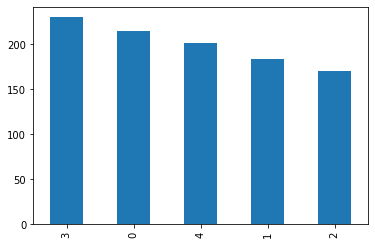

In [350]:
df['new_start_time'].value_counts().plot.bar()